# Metodo Kohonen
### Entrenamiento
Primero entrenamos el conjunto y obtenemos la red

In [1]:
import numpy as np
from get_data import data, raw_data
from Neuron import Neuron
from utils import *
#Paso Inicial: Inicializo valores

def update_eta(old_eta):
  return old_eta * 1

def update_radius(old_radius):
  return old_radius * 1

def kohonen(k = 3, init_eta = 0.01, init_radius = 2):
  #Paso Inicial: Inicializo valores
  p = len(raw_data)
  labels = raw_data.columns[1:]
  countries = raw_data.values[:,0]
  weights = set_init_weights(k)
  eta = init_eta
  radius = init_radius
  max_epochs = 500 * 28

  t = 1
  cut = False
  #Paso t
  while t < max_epochs and not cut:
    #Paso 1: Selecciono un registro de entrada Xp
    x_index = np.random.choice(range(data.shape[0]))
    x = data[x_index]
    #Paso 2: Encontrar la neurona ganadora
    #w_k = get_winner_neuron(grid,x)
    w_k = get_winner_neuron(weights,x)
    #Paso 3: Actualizar los pesos de las neuronas vecinas
    n_k = update_neighborhood_weight(weights, radius, w_k)
    
    for j in range(k*k):
      if (j in n_k):
        weights[j] = weights[j] + eta * (x-weights[j])
        #grid[i][j].weights = weights[j]
    t += 1
    eta = update_eta(eta)
    radius = update_radius(radius)

  grid = np.empty((k,k), Neuron)
  index = 0
  for i in range(k):
      for j in range(k):
          grid[i][j] = Neuron(weights[index],0,(i,j))
          index += 1
  return grid, k, countries

grid, k, countries = kohonen()

### Visualizacion y analisis
Luego observamos y analizamos los datos obtenidos

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

values = np.zeros((k,k), int)
index = 0
for entrie in data:
    min_position = (None,None)
    min_dist = 999
    for row in grid:
        for col in row:
            w = col.weights
            dist = np.linalg.norm(entrie-w)
            if dist < min_dist:
                min_position = col.position
                min_dist = dist
    grid[min_position[0], min_position[1]].count += 1
    grid[min_position[0], min_position[1]].add_element(countries[index])
    values[min_position[0], min_position[1]] += 1
    index += 1


## Vemos que pais tiene cada neurona

In [3]:
i = 0
for col in grid:
    for j in range(len(col)):
        print('Neurona (',i,',',j,') tiene a: ', grid[i][j].elements)
    i += 1

Neurona ( 0 , 0 ) tiene a:  ['Luxembourg']
Neurona ( 0 , 1 ) tiene a:  ['Czech Republic' 'Hungary' 'Latvia' 'Lithuania' 'Slovakia' 'Slovenia']
Neurona ( 0 , 2 ) tiene a:  ['Greece']
Neurona ( 1 , 0 ) tiene a:  ['Finland' 'Poland' 'Portugal' 'United Kingdom']
Neurona ( 1 , 1 ) tiene a:  ['Croatia']
Neurona ( 1 , 2 ) tiene a:  ['Switzerland']
Neurona ( 2 , 0 ) tiene a:  ['Austria' 'Belgium' 'Denmark' 'Germany' 'Iceland' 'Ireland' 'Italy'
 'Netherlands' 'Norway' 'Sweden']
Neurona ( 2 , 1 ) tiene a:  ['Spain']
Neurona ( 2 , 2 ) tiene a:  ['Bulgaria' 'Estonia' 'Ukraine']


## Lo comparamos en un heat map

Neurona ( 0 , 0 ) tiene a:  ['Luxembourg' 'Luxembourg']
Neurona ( 0 , 1 ) tiene a:  ['Czech Republic' 'Hungary' 'Latvia' 'Lithuania' 'Slovakia' 'Slovenia'
 'Czech Republic' 'Hungary' 'Latvia' 'Lithuania' 'Slovakia' 'Slovenia']
Neurona ( 0 , 2 ) tiene a:  ['Greece' 'Greece']
Neurona ( 1 , 0 ) tiene a:  ['Finland' 'Poland' 'Portugal' 'United Kingdom' 'Finland' 'Poland'
 'Portugal' 'United Kingdom']
Neurona ( 1 , 1 ) tiene a:  ['Croatia' 'Croatia']
Neurona ( 1 , 2 ) tiene a:  ['Switzerland' 'Switzerland']
Neurona ( 2 , 0 ) tiene a:  ['Austria' 'Belgium' 'Denmark' 'Germany' 'Iceland' 'Ireland' 'Italy'
 'Netherlands' 'Norway' 'Sweden' 'Austria' 'Belgium' 'Denmark' 'Germany'
 'Iceland' 'Ireland' 'Italy' 'Netherlands' 'Norway' 'Sweden']
Neurona ( 2 , 1 ) tiene a:  ['Spain' 'Spain']
Neurona ( 2 , 2 ) tiene a:  ['Bulgaria' 'Estonia' 'Ukraine' 'Bulgaria' 'Estonia' 'Ukraine']


<AxesSubplot:title={'center':'AGRUPACION DE PAISES'}>

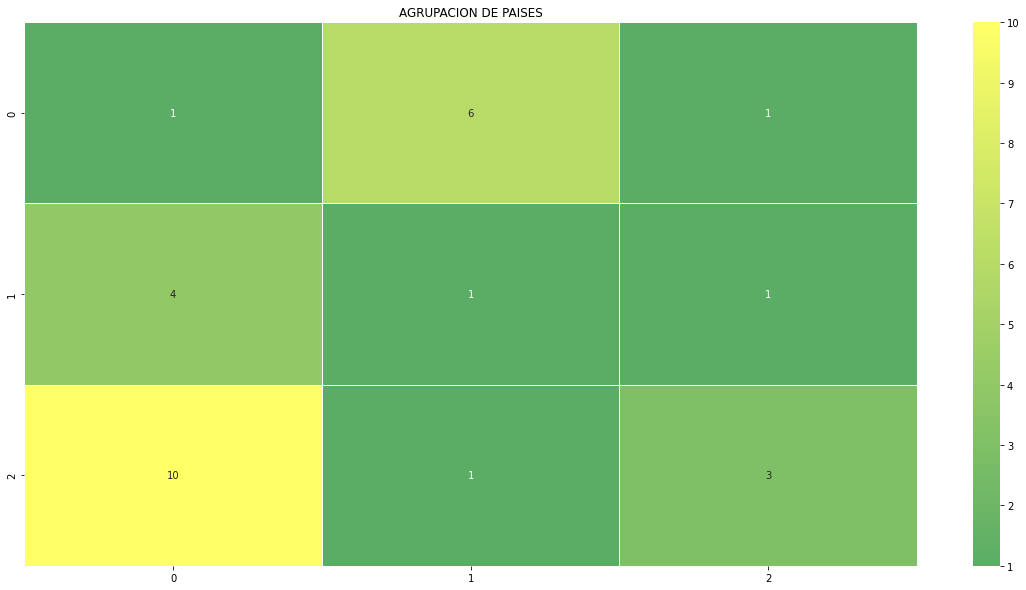

In [4]:
values = np.zeros((k,k), int)
    
index = 0
for entrie in data:
    min_position = (None,None)
    min_dist = 999
    for row in grid:
        for col in row:
            w = col.weights
            dist = np.linalg.norm(entrie-w)
            if dist < min_dist:
                min_position = col.position
                min_dist = dist
    grid[min_position[0], min_position[1]].count += 1
    grid[min_position[0], min_position[1]].add_element(countries[index])
    values[min_position[0], min_position[1]] += 1
    index += 1

fig, ax = plt.subplots(figsize=(20,10))

plt.title('AGRUPACION DE PAISES')
i = 0
for col in grid:
    for j in range(len(col)):
        print('Neurona (',i,',',j,') tiene a: ', grid[i][j].elements)
    i += 1
            
sns.heatmap(values, annot=True, center=3, ax=ax, cmap='summer',linewidths=.5)


## Matriz U

NEIGHBORS 

[-0.58570353 -0.43418298 -0.19356341 -0.5818558  -0.19164667 -0.70724803
 -0.24541323] [-1.00787904  3.42251157  0.04161702  0.51968762 -0.89726824  2.07509647
 -0.91898462] : 

5.001407188931327 
 

[ 0.03616813 -0.04186853 -0.07837833  0.15221874 -0.21611093  0.45452225
  0.2689967 ] [-1.00787904  3.42251157  0.04161702  0.51968762 -0.89726824  2.07509647
 -0.91898462] : 

4.212235976227844 
 

[-0.67563611 -0.97331043 -0.75951067 -0.68094246  0.99620829 -0.42023602
  1.69335744] [-1.00787904  3.42251157  0.04161702  0.51968762 -0.89726824  2.07509647
 -0.91898462] : 

6.176829541325087 
 

SUMA:  15.390472706484257
NEIGHBORS 

[-0.21202286 -0.3904778  -0.03121277  0.61548257  3.42341645 -0.11592718
  1.62804889] [-0.58570353 -0.43418298 -0.19356341 -0.5818558  -0.19164667 -0.70724803
 -0.24541323] : 

4.304616864384748 
 

[-0.67563611 -0.97331043 -0.75951067 -0.68094246  0.99620829 -0.42023602
  1.69335744] [-0.58570353 -0.43418298 -0.19356341 -0.5818558  -0.19164667 -0

<AxesSubplot:title={'center':'MATRIZ U'}>

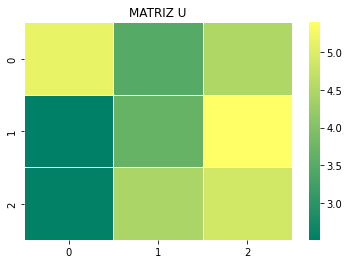

In [5]:
u_values = np.zeros((k,k),float)

def get_neighbors(i,j):
  return [(i,j+1), (i+1,j), (i+1,j+1), (i,j-1), (i-1,j), (i-1,j-1), (i-1, j+1), (i+1, j-1)]

for i in range(k):
    for j in range(k):
        w = grid[i,j].weights
        neighbors = get_neighbors(i,j)
        true_neighbors = 0
        distances = []
        print('NEIGHBORS \n')
        for n in neighbors:
            x, y = n[0], n[1]
            if x >= 0 and y >= 0 and x < k and y < k:
                neighbor_neuron_w = grid[x,y].weights
                print(neighbor_neuron_w, w, ': \n')
                dist = np.linalg.norm(w-neighbor_neuron_w)
                print(dist, '\n \n')
                distances.append(dist)
                true_neighbors += 1
        print('SUMA: ', sum(distances))
        u_values[i][j] = (sum(distances)/true_neighbors)

plt.title('MATRIZ U')
sns.heatmap(u_values,cmap='summer',linewidths=.5, ax=None)